<a href="https://colab.research.google.com/github/mobndash/Exploratory-Data-Analysis-EDA-Techniques/blob/main/EDA_Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **For Numerical Data**

In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


Computing missing data percentage as compared to original

In [ ]:
df.isnull().sum()/len(df) * 100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


Identifying missing columns with missing data having less than 5 % of the original data

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 aand df[col].isnull().mean() * 100 > 0]
missing_columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

Data that will be left after using dropna

In [ ]:
len(df[missing_columns].dropna())/len(df) * 100

89.68577095730244

Dropped the missing data

In [ ]:
new_df = df[missing_columns].dropna()

Validating if the disribution of the columns before deleting he data and after deleting is the same using hist plot
> The Graph is for Numerical data


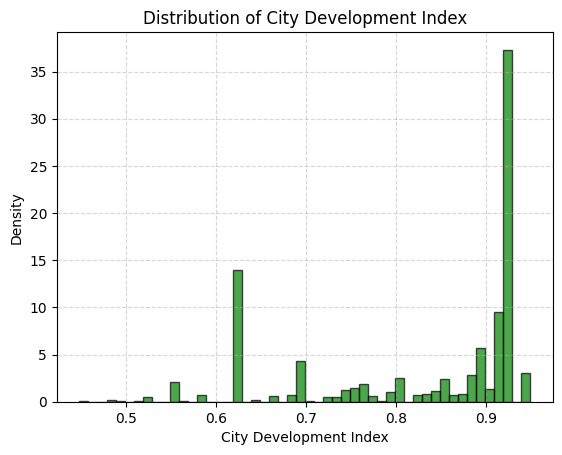

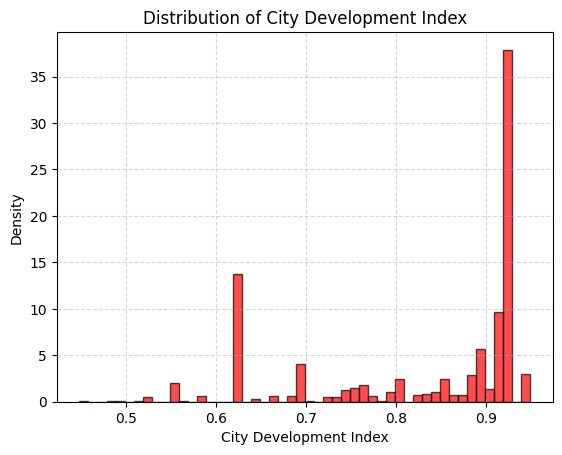

In [ ]:
plt.hist(df["city_development_index"], bins=50, density=True, color="green", alpha=0.7, edgecolor="black")
plt.title("Distribution of City Development Index")
plt.xlabel("City Development Index")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.hist(new_df["city_development_index"], bins=50, density=True, color="red", alpha=0.7, edgecolor="black")
plt.title("Distribution of City Development Index")
plt.xlabel("City Development Index")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

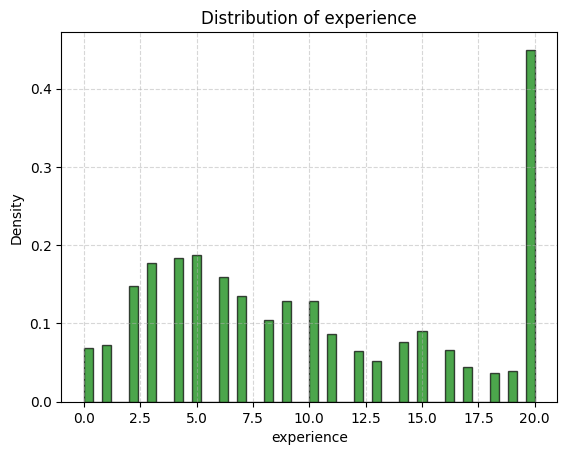

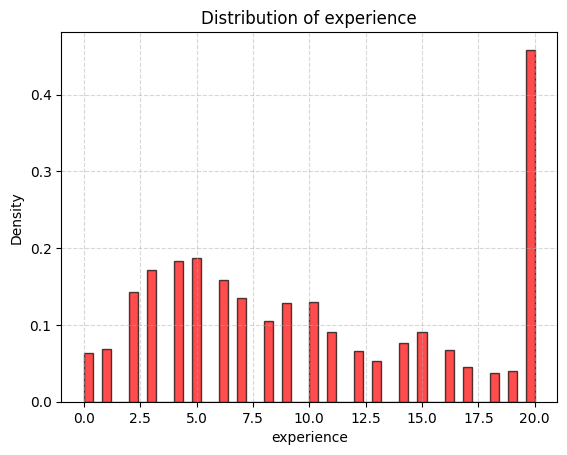

In [ ]:
plt.hist(df["experience"], bins=50, density=True, color="green", alpha=0.7, edgecolor="black")
plt.title("Distribution of experience")
plt.xlabel("experience")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.hist(new_df["experience"], bins=50, density=True, color="red", alpha=0.7, edgecolor="black")
plt.title("Distribution of experience")
plt.xlabel("experience")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



> Validate the ratio for categorical values in categorical columns



In [ ]:
before = df["enrolled_university"].value_counts()/len(df)

In [ ]:
after = new_df["enrolled_university"].value_counts()/len(new_df)

In [ ]:
temp_df = pd.concat([before, after], axis = 1)
temp_df.columns = ["before", "after"]
temp_df

,before,after
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079




> In PROD, if the new data comes, it is difficult to delete/dropna missing values. Hence we usually prefer Imputation



### **Missing Data Imputation using Mean/Median**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 and df[col].isnull().mean() * 100 > 0]
missing_columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
X = df.drop(columns = "target")
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Imputing via Mean, Median

In [ ]:
experience_mean = X_train["experience"].mean()
training_hours_median = X_train["training_hours"].median()

In [ ]:
X_train["experience_mean"] = X_train["experience"].fillna(experience_mean)
X_train["training_hours_median"] = X_train["training_hours"].fillna(training_hours_median)

After Imputing, validate the variance with .var()
After Imputation, the variance will shring, since it is being imputed by mean and median, meaning the value will reduce around mean

In [ ]:
X_train["experience"].var()

42.14794512091847

In [ ]:
X_train["experience_mean"].var()

42.0159319812249

In [ ]:
X_train["training_hours"].var()

3583.246418299249

In [ ]:
X_train["training_hours_median"].var()

3457.752387517494

Validate the distributions via kde plot since it gives smooth probability distribution

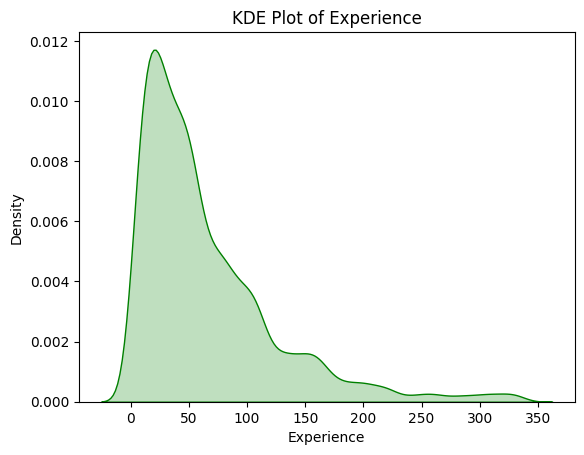

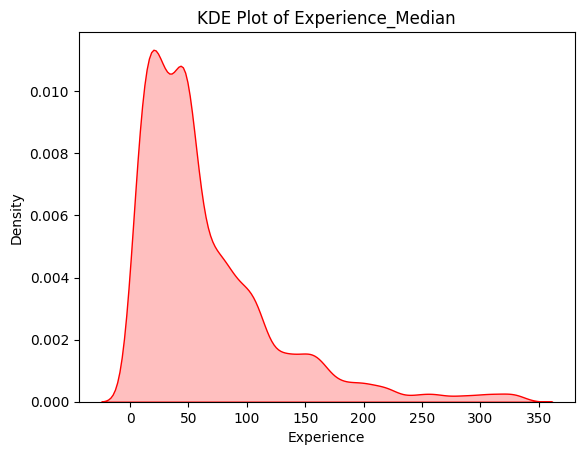

In [ ]:
sns.kdeplot(x=X_train["training_hours"], color="green", shade=True)
plt.title("KDE Plot of Experience")
plt.xlabel("Experience")
plt.ylabel("Density")
plt.show()

sns.kdeplot(x=X_train["training_hours_median"], color="red", shade=True)
plt.title("KDE Plot of Experience_Median")
plt.xlabel("Experience")
plt.ylabel("Density")
plt.show()

<Axes: ylabel='experience'>

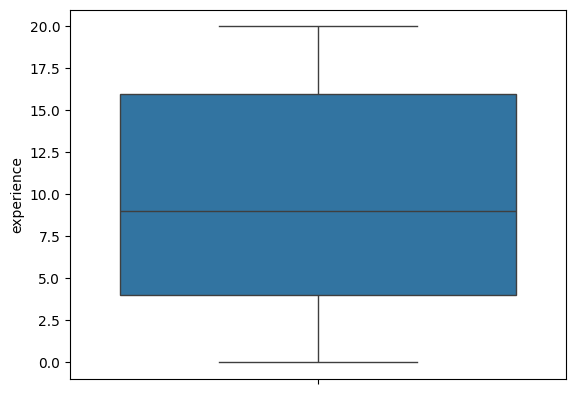

In [ ]:
sns.boxplot(X_train["experience"])

<Axes: ylabel='experience_mean'>

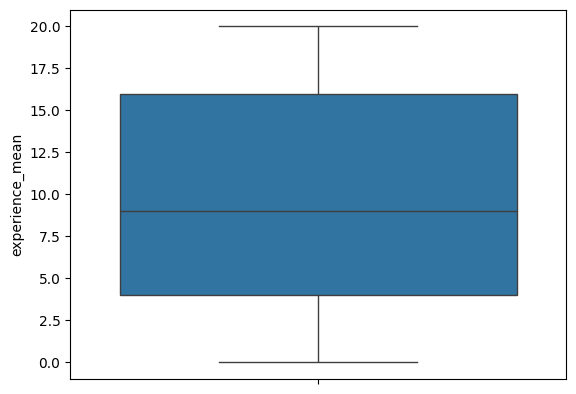

In [ ]:
sns.boxplot(X_train["experience_mean"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Imp : Data is missing at random

---
**Using Simple Imputer** :


> Very Important : While using SimpleImputer, we fit the training data so that model learns from training data w.r.t mean, median and transform the test data, no fit on test data. This prevents data leakage

In [ ]:
# When strategy = constant, custom data can be entered
# mean = SimpleImputer(strategy = "constant", fill_value = 99)

mean = SimpleImputer(strategy = "mean")
median = SimpleImputer(strategy = "median")

In [ ]:
trf = ColumnTransformer([
  ("imputer1", mean, ["experience"]),
  ("imputer2", median, ["training_hours"])
], remainder = "passthrough")

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['experience']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['training_hours'])])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

Imp : Data is not missing at random

---
### **Arbitrary Data Imputation **:

> Numerical data : We impute with data that is not present in the data e.g. Age = 99

> Categorical data : We impute with "missing"

Rest ML model handles it

Imp : Data is not missing at random

---

### **End of Distribution Imputation : Extension of Arbitrary Data Imputation. **Finding best possible for Arbitrary is difficult. So we replace it by the value at the end.
> For Normally Distributed Data : Use missing data with Mean + 3 * sigma(SD)

> For Skewed Data : Use missng data with Q3 + 1.5 * IQR OR Q1 - 1.5 * IQR

Idea is, we ipute via the outliers or extreme values







----------------------------------------------------




---


---



---



---






---

---



### **For Categorical**



> Using Most Frequent for Category columns



In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

Calculating categorical columns which are type object and have missing value sless than 5 %

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtypes == "object" and df[col].isnull().mean() * 100 < 5]
categorical_columns

['city', 'relevent_experience', 'enrolled_university', 'education_level']

In [ ]:
df["education_level"].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


Plotting graph where Graduate is most observed

<Axes: xlabel='target', ylabel='count'>

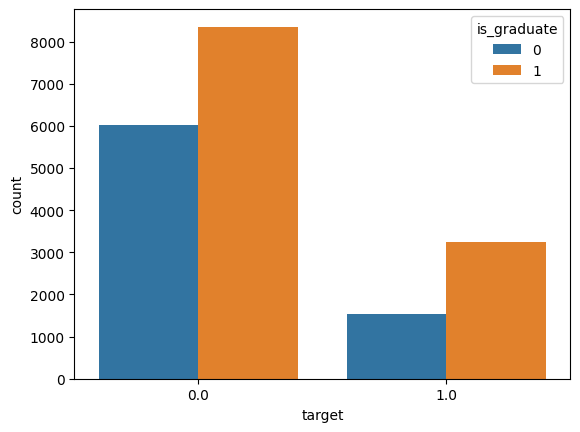

In [ ]:
df["is_graduate"] = (df["education_level"] == "Graduate").astype(int)
sns.countplot(data=df, x="target", hue="is_graduate")


Plotting graph where education level is missing

<Axes: xlabel='target', ylabel='count'>

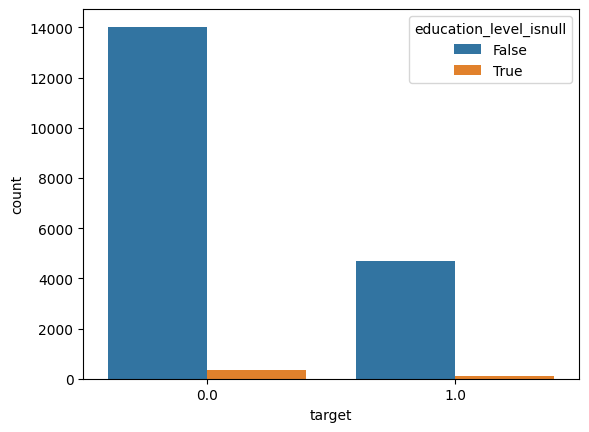

In [ ]:
df["education_level_isnull"] = df["education_level"].isna() == True
sns.countplot(data=df, x="target", hue="education_level_isnull")

In [ ]:
df["education_level"] = df["education_level"].fillna("Graduate")

<Axes: xlabel='target', ylabel='count'>

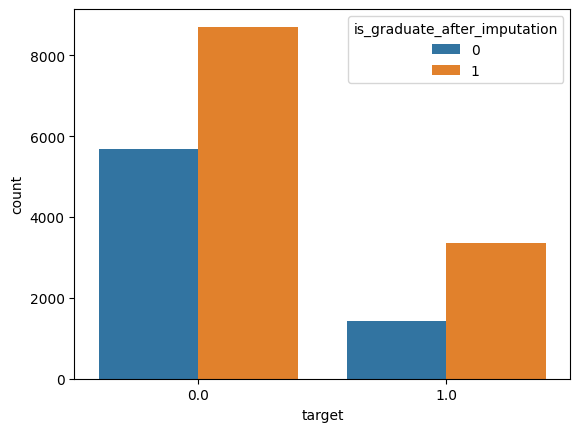

In [ ]:
df["is_graduate_after_imputation"] = (df["education_level"] == "Graduate").astype(int)
sns.countplot(data=df, x="target", hue="is_graduate_after_imputation")

1st(before imputation) and 3rd(after imputation) graph are almost the same, meaning the distribtion is not affected


### > Using SimpleImputer for Categorical Columns



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
column_to_drop = ["is_graduate", "education_level_isnull", "is_graduate_after_imputation", "target"]
X = df.drop(columns = column_to_drop)

In [ ]:
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create a single imputer
imputer = SimpleImputer(strategy="most_frequent")

# Fit on training data, transform both train and test
X_train = imputer.fit_transform(X_train)   # learns from training
X_test  = imputer.transform(X_test)

In [ ]:
X_train.shape

(15326, 12)

In [ ]:
X_test.shape

(3832, 12)



> Missing Category Imputation : Creates a new category called "Missing". ML model handles it automatically. Not preferred though



In [ ]:
df["enrolled_university"].isna().value_counts()

,count
enrolled_university,
False,18772
True,386


In [ ]:
df["enrolled_university"] = df["enrolled_university"].fillna("Missing")

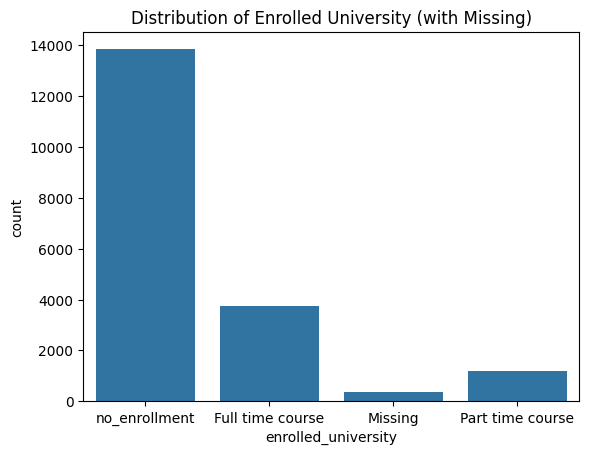

In [ ]:
sns.countplot(data=df, x="enrolled_university")
plt.title("Distribution of Enrolled University (with Missing)")
plt.show()



### > **Randomn Imputation**


> Good for Linear models and NOT for DT models. Preserves the variance and distribution of the data. But, is memory heavy for deployment.





> For Numerical data


In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 and df[col].isnull().mean() > 0 and df[col].dtypes != "object"]
missing_columns

['city_development_index', 'experience', 'training_hours']

In [ ]:
df["experience_random_imputed"] = df["experience"]

In [ ]:
missing_values = df["experience_random_imputed"].isnull()

# Sample random values
random_sample = df["experience"].dropna().sample(
    n=missing_values.sum(),
    replace=True,
    # random_state = int(observation["work_ex"]) # if you want to impute values equivalent to work_ex
    random_state=42       # for reproducibility
).values

# Assign safely
df.loc[missing_values, "experience_random_imputed"] = random_sample

In [ ]:
df[["experience", "experience_random_imputed"]]

,experience,experience_random_imputed
0,20.0,5.0
1,15.0,3.0
2,5.0,2.0
3,0.0,20.0
4,20.0,8.0
...,...,...
19153,14.0,17.0
19154,14.0,3.0
19155,20.0,20.0
19156,0.0,14.0


<Axes: xlabel='experience_random_imputed', ylabel='Density'>

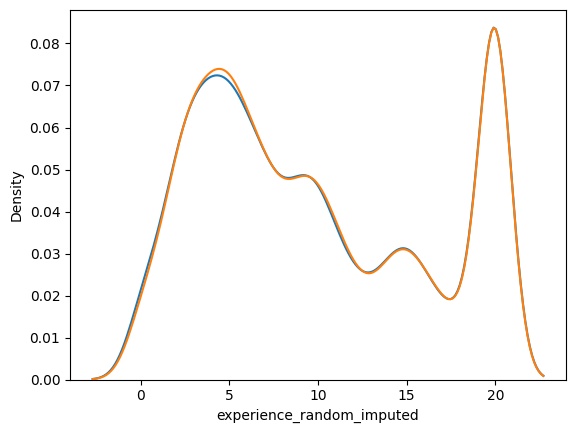

In [ ]:
sns.distplot(df["experience"], hist = False)
sns.distplot(df["experience_random_imputed"], hist = False)



>For Categorical Data



In [ ]:
categorical_missing = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 and df[col].dtypes == "object"]
categorical_missing

['city', 'relevent_experience', 'enrolled_university', 'education_level']

In [ ]:
df["education_level_imputed"] = df["education_level"]

In [ ]:
missing_values = df["education_level_imputed"].isnull()

random_sample = df["education_level"].dropna().sample(
    n = missing_values.sum(),
    replace = True,
    random_state = 42
).values

df.loc[missing_values, "education_level_imputed"] = random_sample

<Axes: xlabel='education_level_imputed', ylabel='count'>

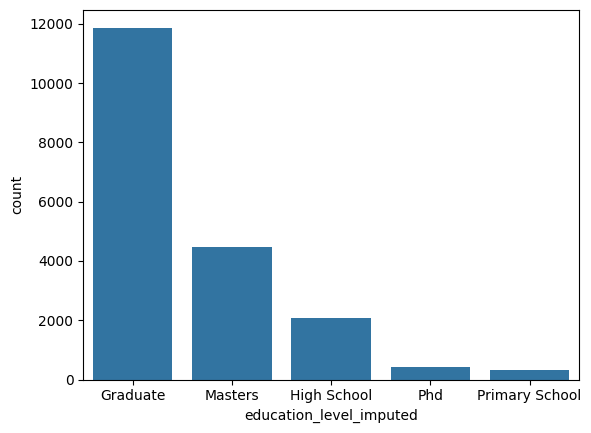

In [ ]:
sns.countplot(data=df, x="education_level_imputed")



### > **Missing Indicator**
Create a new column named "Age_Na" to identify True for Age where the value is missing



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Example dataset
df = pd.DataFrame({
    "age": [25, np.nan, 35, np.nan, 45],
    "salary": [50000, 60000, np.nan, 80000, 90000]
})

print("Original Data:")
print(df)

# Create SimpleImputer with indicator
imputer = SimpleImputer(strategy="mean", add_indicator=True)

# Fit + transform
imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(imputed)

print("\nImputed Data with Missing Indicators:")
print(df_imputed)

Original Data:
    age   salary
0  25.0  50000.0
1   NaN  60000.0
2  35.0      NaN
3   NaN  80000.0
4  45.0  90000.0

Imputed Data with Missing Indicators:
      0        1    2    3
0  25.0  50000.0  0.0  0.0
1  35.0  60000.0  1.0  0.0
2  35.0  70000.0  0.0  1.0
3  35.0  80000.0  1.0  0.0
4  45.0  90000.0  0.0  0.0




### > **Automatically select best values**
Using GridSearchCV



In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 and df[col].isnull().mean() > 0 and df[col].dtypes == "object"]
missing_columns

['enrolled_university', 'education_level']

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
numerical_features = ['experience', 'training_hours']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['enrolled_university', 'education_level']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['experience',
                                                   'training_hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['enrolled_university',
                                                   'education_level'])])),
                ('classifier', LogisticRegression())])

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.752


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.752316
1,0.1,most_frequent,median,0.752316
12,100.0,most_frequent,mean,0.752316
8,10.0,most_frequent,mean,0.752316
4,1.0,most_frequent,mean,0.752251
3,0.1,constant,median,0.752186
5,1.0,most_frequent,median,0.752186
13,100.0,most_frequent,median,0.752186
9,10.0,most_frequent,median,0.752186
2,0.1,constant,mean,0.751925




### > **Multivariate Imputation :**
Using KNN Imputation



In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().mean() * 100 < 5 and df[col].isnull().mean() > 0 and df[col].dtypes != "object"]
missing_columns

['city_development_index', 'experience', 'training_hours']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Example dataset
df = pd.DataFrame({
    "age": [25, np.nan, 35, 40, np.nan],
    "salary": [50000, 60000, np.nan, 80000, 90000],
    "experience": [1, 3, 5, np.nan, 9]
})

print("Original Data:")
print(df)

# Create KNN Imputer (using 2 nearest neighbors here)
imputer = KNNImputer(n_neighbors=2, weights = "distance")

# Fit + transform
imputed = imputer.fit_transform(df)

# Convert back to DataFrame
df_imputed = pd.DataFrame(imputed, columns=df.columns)

print("\nAfter KNN Imputation:")
print(df_imputed)


Original Data:
    age   salary  experience
0  25.0  50000.0         1.0
1   NaN  60000.0         3.0
2  35.0      NaN         5.0
3  40.0  80000.0         NaN
4   NaN  90000.0         9.0

After KNN Imputation:
         age   salary  experience
0  25.000000  50000.0    1.000000
1  34.997172  60000.0    3.000000
2  35.000000  70000.0    5.000000
3  40.000000  80000.0    5.001999
4  35.001999  90000.0    9.000000




> MICE - Multivariate Imputation by Chaining Equation



In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # 👈 important import
from sklearn.impute import IterativeImputer

# Example dataset
df = pd.DataFrame({
    "age": [25, np.nan, 35, 40, np.nan],
    "salary": [50000, 60000, np.nan, 80000, 90000],
    "experience": [1, 3, 5, np.nan, 9]
})

print("Original Data:")
print(df)

# Create IterativeImputer (MICE)
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit + transform
imputed = imputer.fit_transform(df)

# Convert back to DataFrame
df_imputed = pd.DataFrame(imputed, columns=df.columns)

print("\nAfter MICE Imputation:")
print(df_imputed)


Original Data:
    age   salary  experience
0  25.0  50000.0         1.0
1   NaN  60000.0         3.0
2  35.0      NaN         5.0
3  40.0  80000.0         NaN
4   NaN  90000.0         9.0

After MICE Imputation:
         age        salary  experience
0  25.000000  50000.000000    1.000000
1  29.999999  60000.000000    3.000000
2  35.000000  70000.003692    5.000000
3  40.000000  80000.000000    6.999999
4  44.999999  90000.000000    9.000000
